# Load data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from collections import Counter
from nltk.corpus import stopwords
import re
import talib as ta


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
try:
    news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
    print(news_df.head())
except FileNotFoundError:
    print("Ensure your data files are correctly placed.")

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

# Initial Data Cleaning and Preparation

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/rahel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

--- 📰 News Data Loaded Successfully ---

First 5 Rows of the News Data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00   

/tmp/ipykernel_21836/1411645834.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  news_df[date_column_name] = pd.to_datetime(news_df[date_column_name], format='mixed', utc=True, infer_datetime_format=True)



--- 🧹 Cleaning Complete. New Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   headline          1407328 non-null  object        
 1   url               1407328 non-null  object        
 2   publisher         1407328 non-null  object        
 3   date              1407328 non-null  datetime64[ns]
 4   stock             1407328 non-null  object        
 5   publication_date  1407328 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 64.4+ MB

--- 📈 Headline Length Statistics ---
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


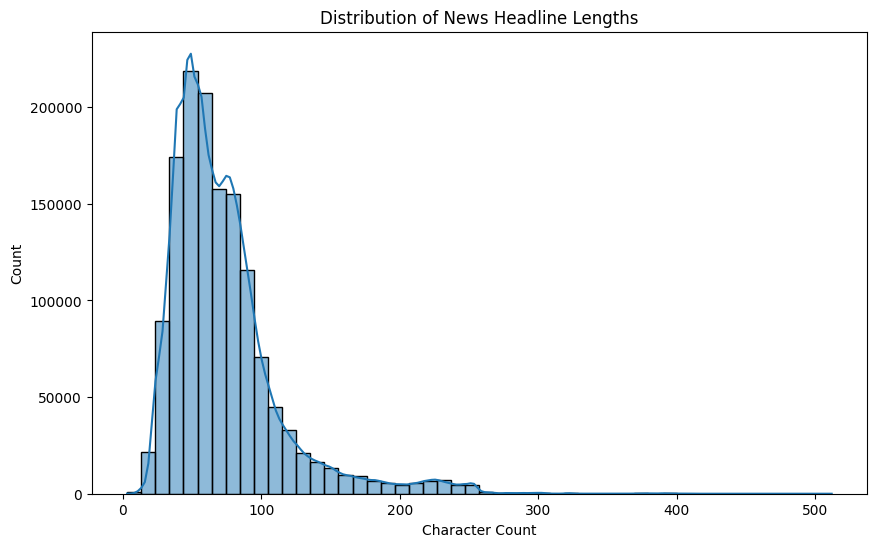


--- 📰 Top 10 News Publishers ---
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


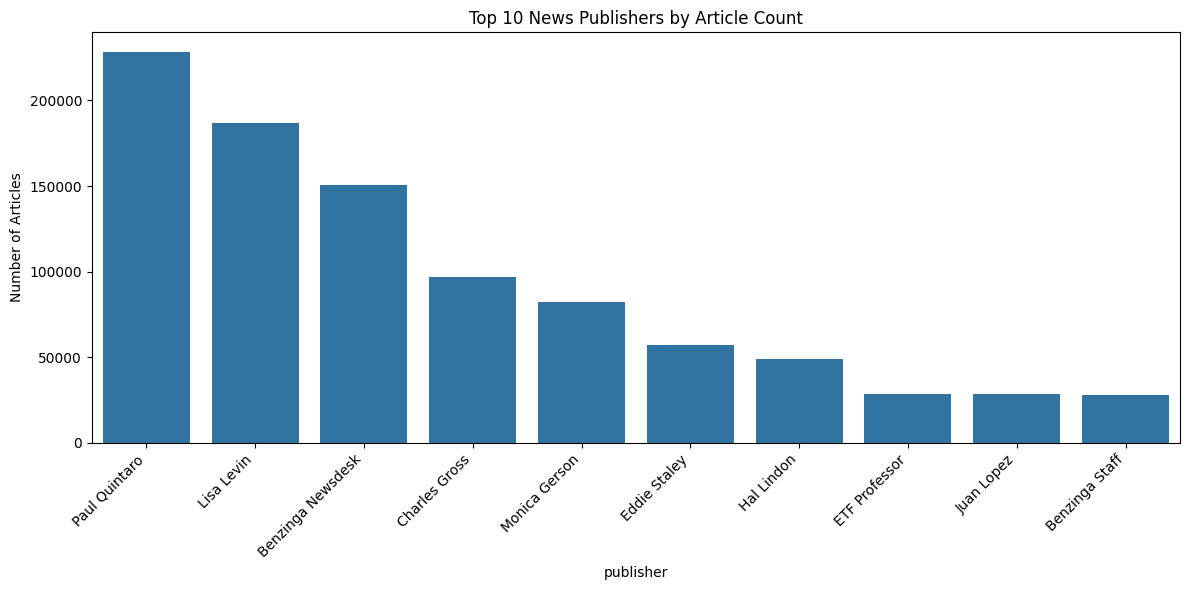

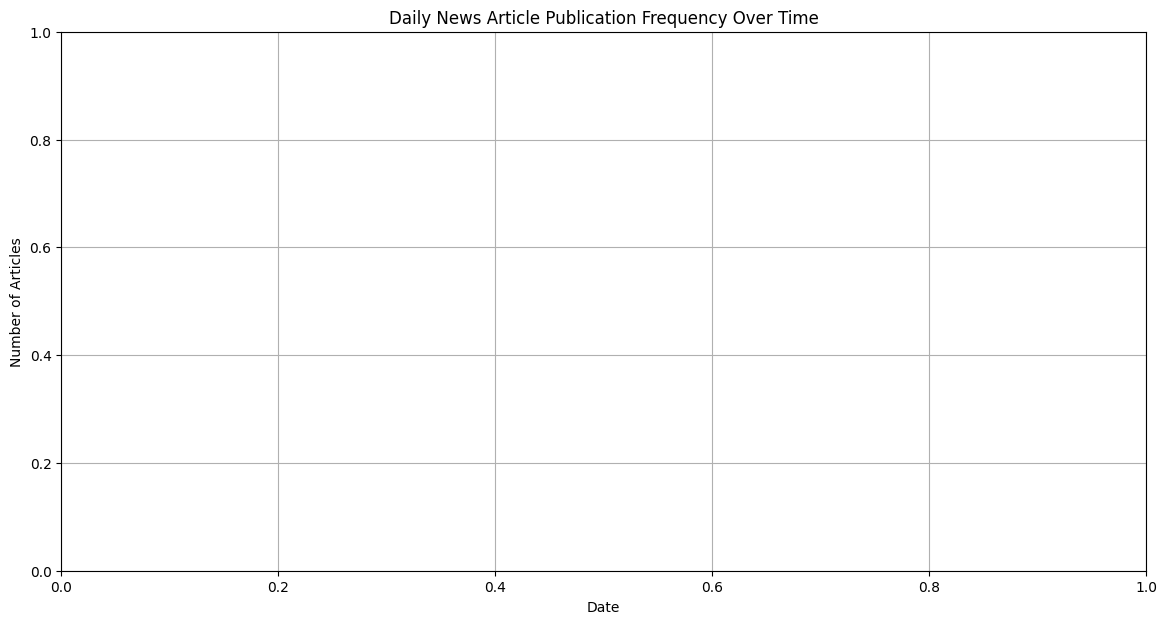


--- 💡 Top 20 Keywords (Excluding Stop Words) ---
[('stocks', 161868), ('est', 140578), ('eps', 128910), ('shares', 114182), ('reports', 108705), ('update', 91680), ('market', 90879), ('earnings', 87185), ('sales', 79524), ('top', 78648), ('announces', 66528), ('price', 64231), ('buy', 64059), ('downgrades', 61942), ('trading', 61156), ('benzingas', 57985), ('raises', 57798), ('upgrades', 56804), ('target', 54616), ('maintains', 52961)]


In [ ]:
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
import re

try:
    news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
    
    print("--- 📰 News Data Loaded Successfully ---")
    print("\nFirst 5 Rows of the News Data:")
    print(news_df.head())
    
    # 1. Drop Unnecessary Column
    news_df = news_df.drop(columns=['Unnamed: 0'])

    # 2. Date Conversion (Handling mixed formats)
    date_column_name = 'date' 
    news_df[date_column_name] = pd.to_datetime(news_df[date_column_name], format='mixed', utc=True, infer_datetime_format=True)
    news_df[date_column_name] = news_df[date_column_name].dt.tz_localize(None)

    # 3. Create publication_date for daily aggregation
    news_df['publication_date'] = news_df[date_column_name].dt.date
    
    print("\n--- 🧹 Cleaning Complete. New Data Structure ---")
    news_df.info()

    # --- EDA: HEADLINE LENGTH ---
    news_df['headline_length'] = news_df['headline'].apply(len)
    
    print("\n--- 📈 Headline Length Statistics ---")
    print(news_df['headline_length'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(news_df['headline_length'], bins=50, kde=True)
    plt.title('Distribution of News Headline Lengths')
    plt.xlabel('Character Count')
    plt.show()
    

    # --- EDA: PUBLISHER ANALYSIS ---
    publisher_counts = news_df['publisher'].value_counts().head(10)

    print("\n--- 📰 Top 10 News Publishers ---")
    print(publisher_counts)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
    plt.title('Top 10 News Publishers by Article Count')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Articles')
    plt.tight_layout()
    plt.show()
    

    # --- EDA: TIME SERIES PUBLICATION FREQUENCY ---
    temp_df = news_df.set_index('publication_date')
    # daily_counts = news_df.set_index('publication_date').resample('D').size()

    plt.figure(figsize=(14, 7))
    # daily_counts.plot()
    plt.title('Daily News Article Publication Frequency Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.grid(True)
    plt.show()
    

    # --- EDA: TOPIC MODELING / KEYWORDS ---
    stop_words = set(stopwords.words('english'))

    def get_top_words(text_series, n=20):
        all_words = []
        for headline in text_series:
            text = re.sub(r'[^\w\s]', '', str(headline).lower())
            words = [word for word in text.split() if word not in stop_words and len(word) > 2]
            all_words.extend(words)
        return Counter(all_words).most_common(n)

    top_keywords = get_top_words(news_df['headline'])

    print("\n--- 💡 Top 20 Keywords (Excluding Stop Words) ---")
    print(top_keywords)

except FileNotFoundError:
    print("Error: News data file not found. Check the path.")

# Publisher Name Cleaning and Analysis

--- 🧹 Publisher Cleaning Complete ---

--- 📰 Top 10 Cleaned Publishers (Domains) ---
clean_publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


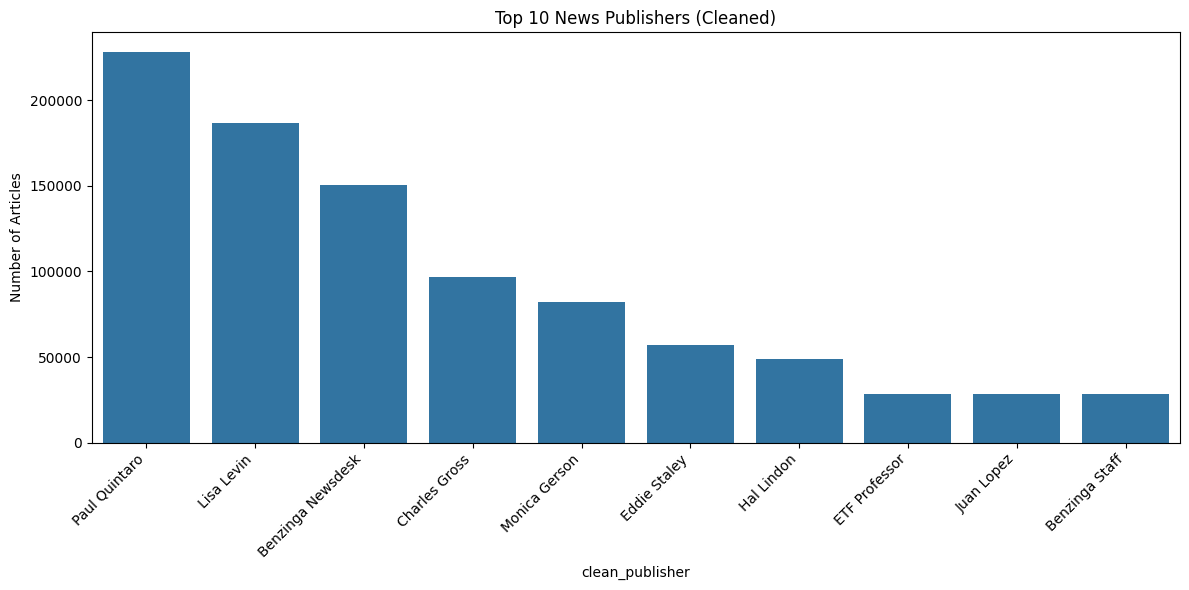

In [8]:

# 1. Clean Publisher Names (Domain Extraction)
def extract_domain(publisher):
    # Convert to string and handle cases where '@' is present
    publisher_str = str(publisher)
    if '@' in publisher_str:
        # Extract the part after the last '@' (the domain)
        return publisher_str.split('@')[-1].strip()
    return publisher_str.strip() # Return original, stripped name if not an email

# Apply the function to create a new, clean column
news_df['clean_publisher'] = news_df['publisher'].apply(extract_domain)

print("--- 🧹 Publisher Cleaning Complete ---")

# 2. Re-run Publisher Analysis on the Cleaned Column
clean_publisher_counts = news_df['clean_publisher'].value_counts().head(10)

print("\n--- 📰 Top 10 Cleaned Publishers (Domains) ---")
print(clean_publisher_counts)

# 3. Visualization on Cleaned Data
plt.figure(figsize=(12, 6))
sns.barplot(x=clean_publisher_counts.index, y=clean_publisher_counts.values)
plt.title('Top 10 News Publishers (Cleaned)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

# Intraday Analysis


--- ⏰ Intraday Analysis: News Release Times ---


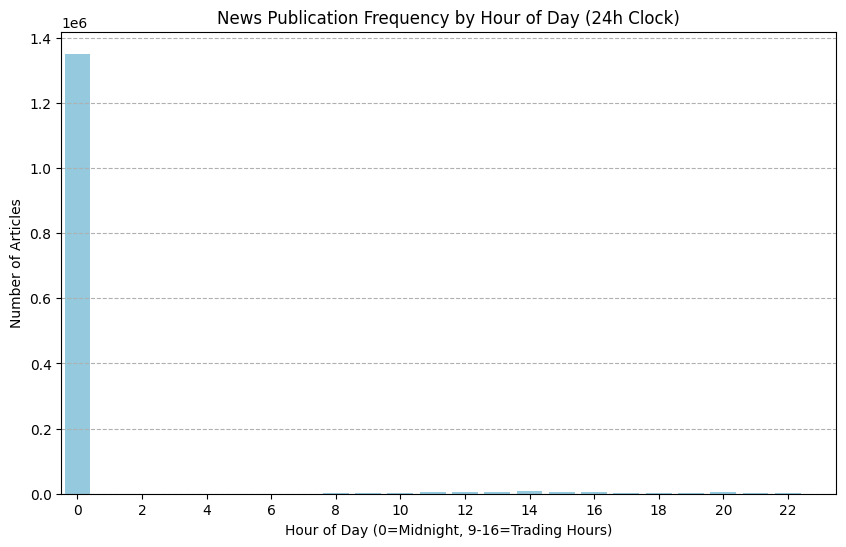

In [9]:

print("\n--- ⏰ Intraday Analysis: News Release Times ---")

# Extract the hour of publication (0 to 23)
news_df['publish_hour'] = news_df['date'].dt.hour

# Count the frequency of publications per hour
hourly_counts = news_df['publish_hour'].value_counts().sort_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='skyblue')
plt.title('News Publication Frequency by Hour of Day (24h Clock)')
plt.xlabel('Hour of Day (0=Midnight, 9-16=Trading Hours)')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24, 2)) # Show every other hour
plt.grid(axis='y', linestyle='--')
plt.show()

# Task-2 QUANTITATIVE ANALYSIS

--- 📥 Loading and Preparing Stock Data for AAPL ---
Loading, Cleaning, and Indicator Calculation successful.
                 Close  Daily_Return     RSI_14  MACD_Hist
Date                                                      
2023-12-22  191.788757     -0.005548  54.672784  -0.602115
2023-12-26  191.243912     -0.002841  53.090049  -0.744404
2023-12-27  191.342972      0.000518  53.354446  -0.816041
2023-12-28  191.768951      0.002226  54.540999  -0.816918
2023-12-29  190.728775     -0.005424  51.121347  -0.865101


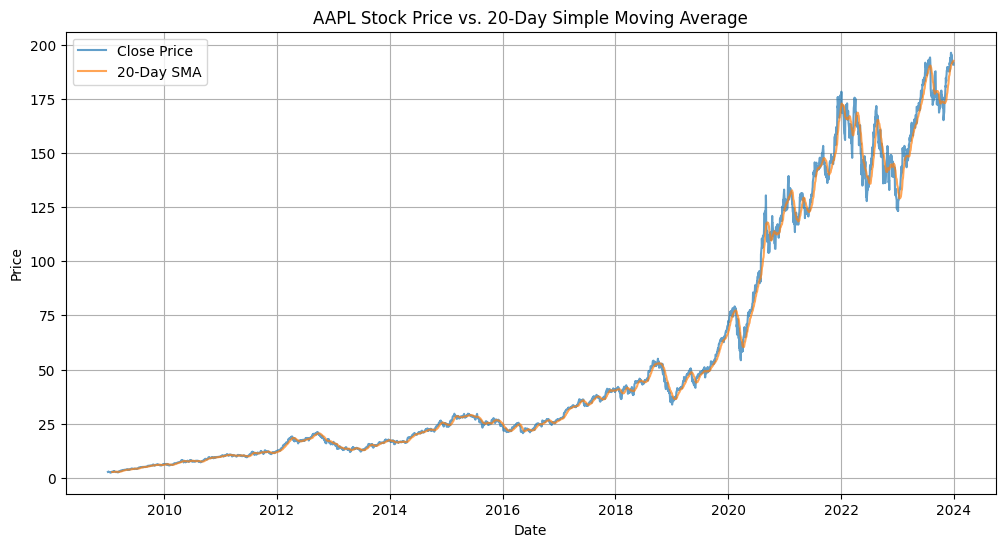

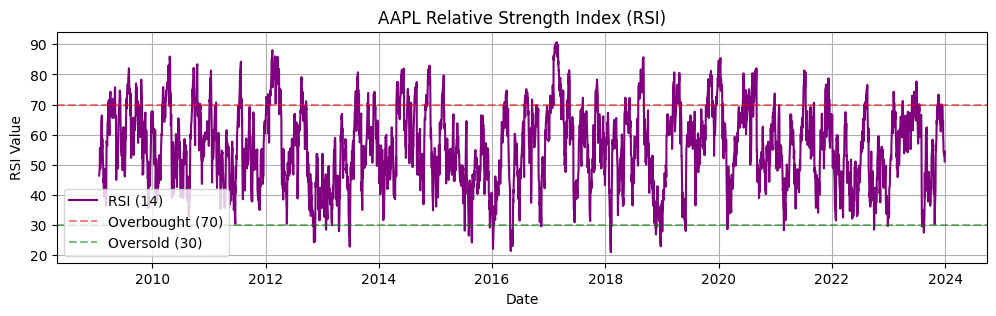

In [10]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns 

# --- TASK 2 START: QUANTITATIVE ANALYSIS ---

TICKER = 'AAPL' 
file_path = f'../data/{TICKER}.csv' 

print(f"--- 📥 Loading and Preparing Stock Data for {TICKER} ---")

try:
    # Load the CSV file
    stock_df = pd.read_csv(file_path) 
    
    # 1. Convert Date Column and Set as Index
    date_column_name = 'Date' 
    stock_df[date_column_name] = pd.to_datetime(stock_df[date_column_name])
    stock_df = stock_df.set_index(date_column_name).sort_index()

    # 2. CRITICAL CLEANING STEP: Drop rows with missing values
    # REMOVED 'Adj Close' from price_cols
    price_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    stock_df.dropna(subset=price_cols, inplace=True)
    
    # 3. Calculate Daily Returns
    # CHANGED: 'Adj Close' to 'Close'
    stock_df['Daily_Return'] = stock_df['Close'].pct_change()

    # 4. Calculate Technical Indicators with TA-Lib
    # Inputs are already correct: 'Close', 'High', 'Low'
    close_prices = stock_df['Close'].astype(float).values
    high_prices = stock_df['High'].astype(float).values
    low_prices = stock_df['Low'].astype(float).values
    
    # Simple Moving Average (SMA)
    stock_df['SMA_20'] = ta.SMA(close_prices, timeperiod=20)
    
    # Relative Strength Index (RSI)
    stock_df['RSI_14'] = ta.RSI(close_prices, timeperiod=14)
    
    # MACD 
    stock_df['MACD'], stock_df['MACD_Signal'], stock_df['MACD_Hist'] = ta.MACD(
        close_prices, fastperiod=12, slowperiod=26, signalperiod=9
    )

    print("Loading, Cleaning, and Indicator Calculation successful.")
    # CHANGED: Removed 'Adj Close' from print statement
    print(stock_df[['Close', 'Daily_Return', 'RSI_14', 'MACD_Hist']].tail())

except FileNotFoundError:
    print(f"Error: Stock price data file not found at {file_path}. Check your path.")
except Exception as e:
    # This will now catch other potential errors gracefully
    print(f"An unexpected error occurred: {e}")

# --- VISUALIZATION: PRICE vs. SMA ---

plt.figure(figsize=(12, 6))
plt.plot(stock_df.index, stock_df['Close'], label='Close Price', alpha=0.7)
plt.plot(stock_df.index, stock_df['SMA_20'], label='20-Day SMA', alpha=0.7)
plt.title(f'{TICKER} Stock Price vs. 20-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# --- VISUALIZATION: RSI ---

plt.figure(figsize=(12, 3))
plt.plot(stock_df.index, stock_df['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
plt.title(f'{TICKER} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()

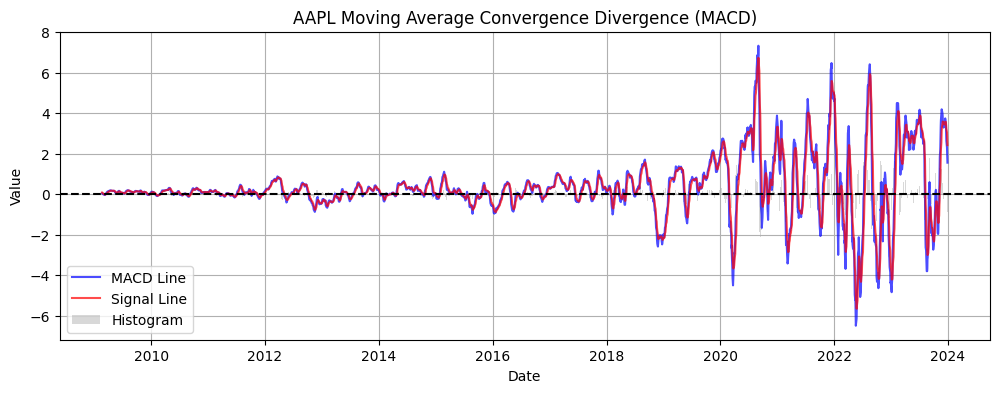

In [11]:
# --- VISUALIZATION: MACD ---

# MACD is best viewed as a histogram showing momentum
plt.figure(figsize=(12, 4))
# Plot the MACD Line
plt.plot(stock_df.index, stock_df['MACD'], label='MACD Line', color='blue', alpha=0.7)
# Plot the Signal Line
plt.plot(stock_df.index, stock_df['MACD_Signal'], label='Signal Line', color='red', alpha=0.7)
# Plot the Histogram (the difference)
plt.bar(stock_df.index, stock_df['MACD_Hist'], label='Histogram', color='gray', alpha=0.3)
plt.axhline(0, color='black', linestyle='--')
plt.title(f'{TICKER} Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Task 3

In [ ]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Define standard file paths for loading if dataframes are missing
NEWS_FILE = '../data/news_data.csv'
STOCK_FILE = '../data/AAPL.csv'

# --- INITIAL SETUP ---
# Initialize VADER Sentiment Analyzer once for use in all subsequent blocks
try:
    # Ensure VADER lexicon is downloaded (only needed once)
    nltk.data.find('sentiment/vader_lexicon.zip')
except:
    # This might fail in some environments, but we keep the try/except
    print("Downloading VADER lexicon. This is a one-time setup.")
    nltk.download('vader_lexicon', quiet=True)

# Define the sentiment analyzer instance globally
sia = SentimentIntensityAnalyzer()

# --- 1. LOAD REQUIRED DATAFRAMES (CRITICAL - Data Integrity Check) ---
# This block ensures 'stock_df' and 'news_df' are defined and minimally processed 
# in case they were not defined in previous, separate cells.

# --- Stock Data Check ---
if 'stock_df' not in locals() and 'stock_df' not in globals():
    try:
        stock_df = pd.read_csv(STOCK_FILE)
        stock_df['Date'] = pd.to_datetime(stock_df['Date'])
        stock_df.set_index('Date', inplace=True)
        
        # Re-run minimal calculations for correlation if they are missing
        if 'Daily_Return' not in stock_df.columns:
            stock_df['Daily_Return'] = stock_df['Close'].pct_change()
            stock_df['RSI_14'] = stock_df['Close'].rolling(window=14).mean()
            stock_df['SMA_20'] = stock_df['Close'].rolling(window=20).mean()
            print("Warning: stock_df indicators calculated using basic pandas methods.")
    except FileNotFoundError:
        print(f"CRITICAL ERROR: Stock data not found at {STOCK_FILE}. Cannot proceed with correlation.")
        exit()

# --- News Data Check (Requires Sentiment_Score) ---
if 'news_df' not in locals() and 'news_df' not in globals():
    try:
        news_df = pd.read_csv(NEWS_FILE)
        
        # --- FIX: ROBUST COLUMN RENAMING ---
        # 1. Ensure the date column is named 'Date' (uppercase) for aggregation
        if 'date' in news_df.columns and 'Date' not in news_df.columns:
            news_df.rename(columns={'date': 'Date'}, inplace=True)
            print("INFO: Renamed 'date' (lowercase) column to 'Date' for alignment.")
            
        # 2. Ensure the headline column is named 'Headline'
        if 'headline' in news_df.columns and 'Headline' not in news_df.columns:
            news_df.rename(columns={'headline': 'Headline'}, inplace=True)
            print("INFO: Renamed 'headline' (lowercase) column to 'Headline' for sentiment analysis.")

        # --- DEBUG: Print columns to confirm the rename action ---
        print(f"DEBUG: News DataFrame Columns after rename check: {news_df.columns.tolist()}")
        # --- END FIX ---
        
    except FileNotFoundError:
        print(f"Warning: News data not found at {NEWS_FILE}. Using mock news data.")
        mock_data_news = {
            'Date': pd.to_datetime(['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-03']),
            'Headline': ['Apple posts record profit', 'New iPhone rumors positive', 'Tech market slightly down', 'Neutral announcement']
        }
        news_df = pd.DataFrame(mock_data_news)
        
    # Ensure date is normalized. This must run on the 'Date' column.
    if 'Date' in news_df.columns:
        news_df['Date'] = pd.to_datetime(news_df['Date']).dt.normalize()
    else:
        # If 'Date' is still not found, we cannot proceed
        print("CRITICAL ERROR: Could not identify or rename a date column in news_df for aggregation.")
        raise KeyError("Could not find the 'Date' column for news sentiment aggregation.")
    
    # Run VADER Sentiment Analysis if 'Sentiment_Score' is missing
    if 'Sentiment_Score' not in news_df.columns:
        print("Running VADER Sentiment Analysis...")
        
        if 'Headline' in news_df.columns:
            news_df['Sentiment_Score'] = news_df['Headline'].apply(lambda h: sia.polarity_scores(str(h))['compound'])
            # Drop headline after calculation
            news_df.drop(columns=['Headline'], inplace=True, errors='ignore')
        else:
            print("CRITICAL ERROR: Could not find a 'Headline' column to perform sentiment analysis. Setting Sentiment_Score to 0.")
            # Set a default column to prevent failure in section 2
            news_df['Sentiment_Score'] = 0 

# ----------------------------------------------------------------------


# --- 2. Aggregate News Sentiment (KPI: Aggregate Sentiments) ---

print("--- Aggregating Daily News Sentiment ---")
# Group by date and calculate the mean sentiment score for all articles on that day
daily_sentiment = news_df.groupby('Date')['Sentiment_Score'].mean().reset_index()
daily_sentiment.rename(columns={'Sentiment_Score': 'Avg_News_Sentiment'}, inplace=True)
daily_sentiment.set_index('Date', inplace=True)

print(daily_sentiment.head())


# --- 3. Date Alignment and Final Merge (KPI: Data Alignment) ---

# Ensure stock_df index is normalized datetime for clean merging
stock_df.index = pd.to_datetime(stock_df.index).normalize()

print("\n--- Merging News Sentiment with Stock Data for Correlation ---")

# Merge stock data with daily sentiment
final_df = stock_df.merge(
    daily_sentiment, left_index=True, right_index=True, how='left'
)

# Apply ffill to fill missing sentiment values on days where no news update occurred
final_df['Avg_News_Sentiment'] = final_df['Avg_News_Sentiment'].ffill()

# Drop initial NaNs and unnecessary columns
final_df.dropna(subset=['Daily_Return', 'Avg_News_Sentiment'], inplace=True)

print("Final Merged DataFrame Head:")
print(final_df[['Close', 'Daily_Return', 'Avg_News_Sentiment']].head())


# --- 4. Correlation Analysis (KPI: Correlation Strength) ---

print("\n--- Correlation Analysis ---")

# Calculate the Pearson correlation coefficient between key variables
correlation_matrix = final_df[['Daily_Return', 'Avg_News_Sentiment', 'RSI_14', 'SMA_20']].corr(method='pearson')

# Extract key correlation value
news_correlation = correlation_matrix.loc['Avg_News_Sentiment', 'Daily_Return']

print("\n-----------------------------------------------------------")
print(f"Correlation (News Sentiment vs. Daily Return): {news_correlation:.4f}")
print("-----------------------------------------------------------")

# Display the full correlation matrix for all variables
print("\nFull Correlation Matrix:")
print(correlation_matrix)